In [1]:
from quantopian.research import symbols, run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import Fundamentals, USEquityPricing
from quantopian.pipeline.filters import Q1500US
from quantopian.pipeline.factors import AverageDollarVolume, SimpleMovingAverage

In [2]:
def make_pipeline():
    prices = USEquityPricing.close.latest
    pe_ratio = Fundamentals.pe_ratio.latest
    eps = Fundamentals.basic_eps_earnings_reports.latest
    
    positive_eps = (eps > 0)
    market_cap_10B = Q1500US(10000000000)
    large_cap_pos_earnings = positive_eps & market_cap_10B    
        
    dollar_volume_traded_1w = AverageDollarVolume(window_length=6, mask=large_cap_pos_earnings)
    high_volume = dollar_volume_traded_1w.percentile_between(70, 100)
            
    return Pipeline(
        columns= {
            'Price': prices,
            'P/E Ratio': pe_ratio
        },
        screen=high_volume
    )

In [3]:
# Generate pipeline for notebook research
start_date = '2019-09-16'
end_date = '2019-11-20'
df = run_pipeline(make_pipeline(), start_date, end_date)
df

P/E Ratio     Price
2019-09-16 00:00:00+00:00 Equity(24 [AAPL])         18.569610   218.800
                          Equity(62 [ABT])          52.018519    84.260
                          Equity(67 [ADSK])        590.307692   153.480
                          Equity(114 [ADBE])        52.028037   278.350
                          Equity(337 [AMAT])        16.353503    51.350
                          Equity(351 [AMD])        170.500000    30.710
                          Equity(368 [AMGN])        15.464399   195.450
                          Equity(679 [AXP])         14.752475   119.170
                          Equity(700 [BAC])         10.736655    30.130
                          Equity(939 [BLL])         47.535948    72.710
                          Equity(980 [BMY])         13.042216    49.420
                          Equity(1131 [BSX])        42.232323    41.810
                          Equity(1267 [CAT])        12.410019   133.770
                          Equity(1335 [C])           9.776389    70.380
                          Equity(1406 [CELG])       13.479452    98.410
                          Equity(1539 [CI])         14.907322   160.850
                          Equity(1637 [CMCS_A])     17.893130    46.890
                          Equity(1787 [COST])       35.859951   291.960
                          Equity(1900 [CSCO])       19.168582    50.040
                          Equity(1937 [CSX])        17.462651    72.500
                          Equity(2127 [DE])         16.075802   165.380
                          Equity(2170 [DHR])        41.233918   141.000
                          Equity(2190 [DIS])        18.329349   138.000
                          Equity(2564 [EOG])        12.908943    79.380
                          Equity(2602 [EA])         13.812062    98.470
                          Equity(2673 [F])          17.500000     9.460
                          Equity(2853 [FISV])       43.109244   102.570
                          Equity(2968 [NEE])        31.573699   218.460
                          Equity(3212 [GILD])       14.367171    66.520
                          Equity(3443 [HAL])        13.423841    20.260
...                                                       ...       ...
2019-11-20 00:00:00+00:00 Equity(25010 [USB])       13.659770    59.420
                          Equity(25090 [HON])       21.042056   180.140
                          Equity(25339 [ISRG])      52.479564   577.800
                          Equity(25555 [ACN])       26.948370   198.290
                          Equity(26401 [CRM])      136.633333   164.020
                          Equity(26578 [GOOG_L])    28.179261  1312.370
                          Equity(27173 [DXCM])     285.125000   217.540
                          Equity(27543 [EXPE])      28.322388    94.890
                          Equity(28016 [CMG])       69.897903   766.770
                          Equity(32146 [MA])        42.330861   285.280
                          Equity(33698 [TMUS])      19.835476    77.170
                          Equity(34395 [LULU])      53.683168   216.910
                          Equity(35902 [PM])        17.387500    83.481
                          Equity(35920 [V])         34.355263   182.760
                          Equity(38650 [AVGO])      44.125000   317.700
                          Equity(39095 [CHTR])      86.769928   479.010
                          Equity(39840 [TSLA])       5.008097   359.520
                          Equity(39994 [NXPI])      77.033784   114.000
                          Equity(40430 [GM])         5.925081    36.390
                          Equity(40852 [KMI])       22.233333    20.010
                          Equity(41636 [MPC])       13.329741    61.840
                          Equity(42950 [FB])        31.942308   199.330
                          Equity(43127 [NOW])     1543.000000   277.620
                          Equity(43694 [ABBV])      39.215859    89.030
                    

In [4]:
# Choose subset of stocks that were chosen during my class simulation
stock_choices = ['DIS', 'GS', 'FB', 'V', 'AAPL', 'AMZN', 'NKE', 'GOOG', 'LMT']
simulation_df = df.loc[(slice(None), symbols(stock_choices)), :]

In [5]:
# Create dataframes for each stock to determine if its data met the pipeline criteria
for ticker in stock_choices:
    print(ticker)
    print(len(simulation_df.loc[(slice(None), symbols(ticker)), :]) > 0, "\n")

DIS
True 

GS
True 

FB
True 

V
True 

AAPL
True 

AMZN
True 

NKE
True 

GOOG
False 

LMT
True 



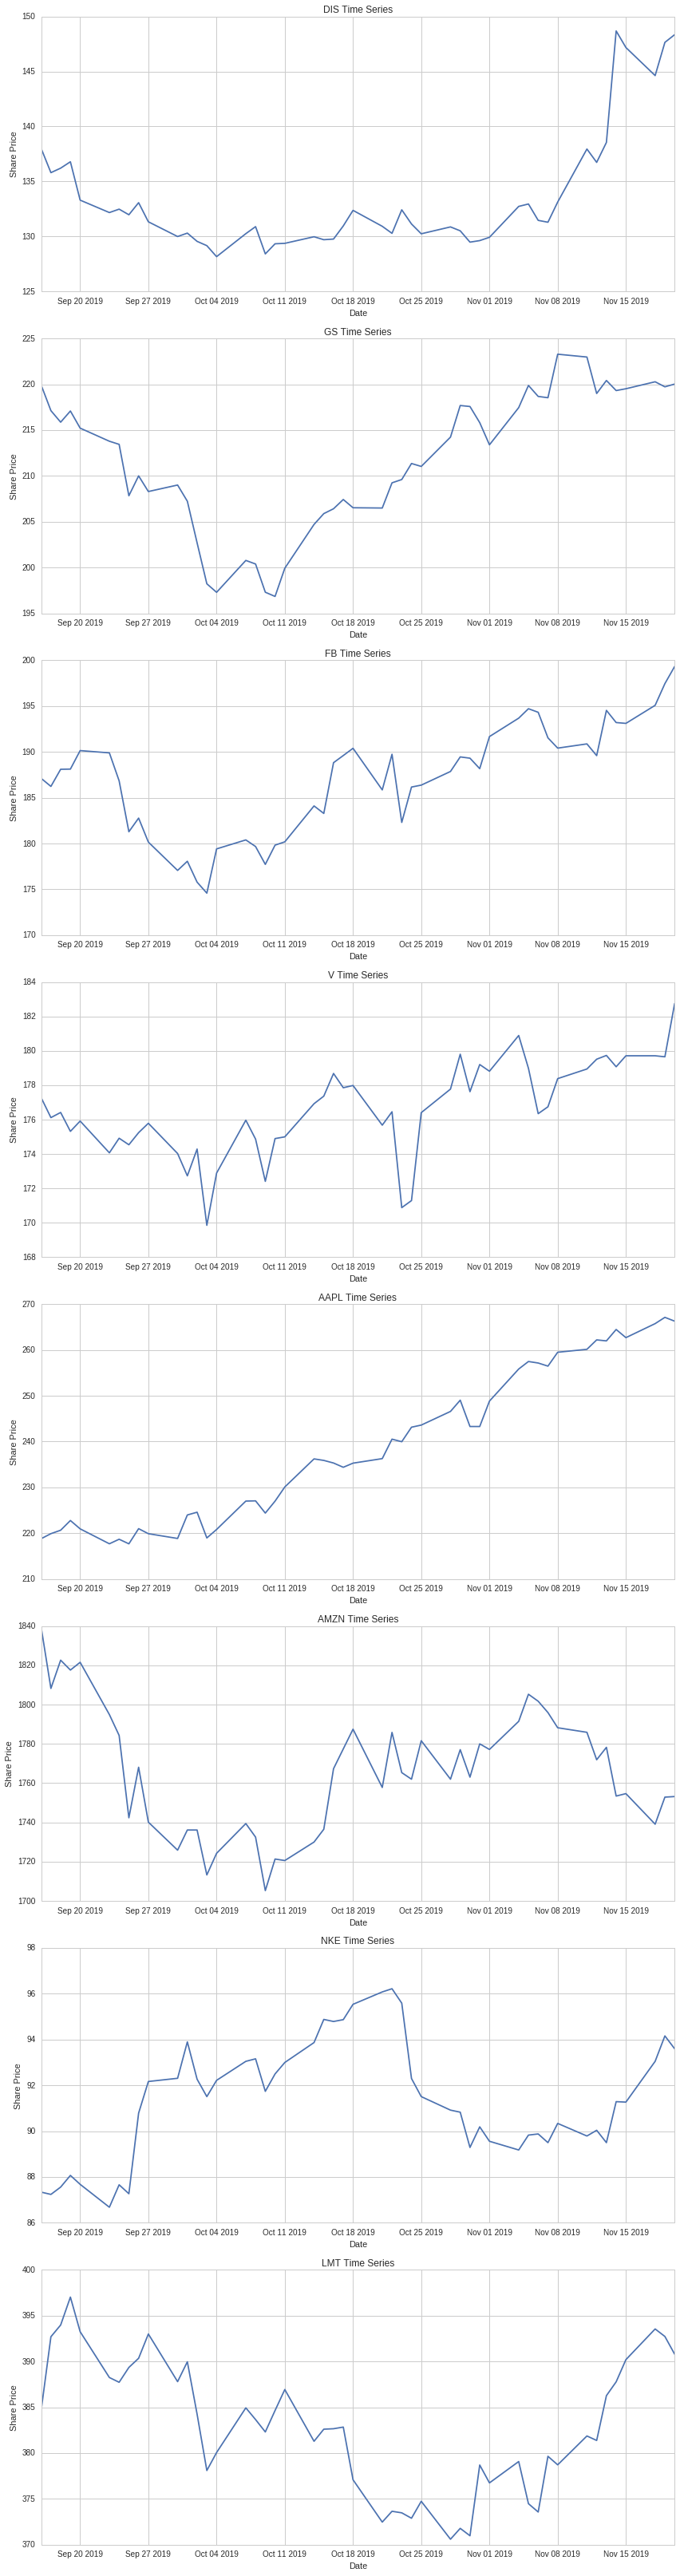

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 45))

# Remove Google stock since its data failed to meet filter criteria
stock_choices.remove('GOOG')

# Plot individual line graphs of each stock's price
for i, ticker in enumerate(stock_choices):
    plt.subplot(len(stock_choices), 1, (i+1))
    plt.title(ticker + " Time Series")
    plt.xlabel('Date')
    plt.ylabel('Share Price')
    
    stock_price = simulation_df.loc[(slice(None), symbols(ticker)), 'Price']
    plt.plot(simulation_df.index.get_level_values(0)[::len(stock_choices)], stock_price)
#     SimpleMovingAverage(inputs=stock_price, window_length=5)
#     SimpleMovingAverage(inputs=stock_price, window_length=20)
        
plt.tight_layout()